# Importing LIBRARIES

In [4]:
import numpy as np
import pandas as pd

# Get The DATA

### Ratings Dataset

In [6]:
col_name = ["user_id", "movie_id1", "rating", "timestamp"]

data = pd.read_csv("ratings.csv")

In [7]:
data.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### Titles and Genres Dataset

In [8]:
col_name = ["movie_id2", "title", "genre"]

movie_titles_genres = pd.read_csv("movies.csv")

In [9]:
movie_titles_genres.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Merge The Datasets -> Titles Datasets and Ratings Datasets

In [10]:
data = pd.merge(data, movie_titles_genres, on="movieId")

data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
5,39,31,3.0,832525157,Dangerous Minds (1995),Drama
6,73,31,3.5,1255591860,Dangerous Minds (1995),Drama
7,88,31,3.0,1239755559,Dangerous Minds (1995),Drama
8,96,31,2.5,1223256331,Dangerous Minds (1995),Drama
9,110,31,4.0,840100695,Dangerous Minds (1995),Drama


#### HOW TO DETERMINE COLUMNS IN YOUR DATAFRAME

In [11]:
print(data.columns.tolist())

['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']


# EDA => Explorative Data Analysis

### Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

### Ratings In Descending Order

In [13]:
data.groupby("title")["rating"].mean().sort_values(ascending=False).head(10)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Name: rating, dtype: float64

### Occurence Of A Movie

In [14]:
data.groupby("title")["rating"].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Jurassic Park (1993)                         274
Matrix, The (1999)                           259
Toy Story (1995)                             247
Schindler's List (1993)                      244
Terminator 2: Judgment Day (1991)            237
Name: rating, dtype: int64

### Rating The Mean Value

In [15]:
ratings = pd.DataFrame(data.groupby("title")["rating"].mean())

ratings.head(10)

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
'Salem's Lot (2004),3.500000
'Til There Was You (1997),2.625000
"'burbs, The (1989)",3.052632
'night Mother (1986),5.000000


### Setting The Number Of Ratings Column

In [16]:
ratings["no. of ratings"] = pd.DataFrame(data.groupby("title")["rating"].count())

ratings.head(10)

,rating,no. of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
'Salem's Lot (2004),3.500000,1
'Til There Was You (1997),2.625000,4
"'burbs, The (1989)",3.052632,19
'night Mother (1986),5.000000,3


### Plotting An Histogram With Respect To No. Of Ratings

<AxesSubplot:>

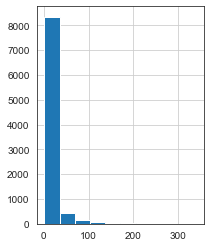

In [18]:
plt.figure(figsize=(3, 4))

ratings["no. of ratings"].hist(bins=10)

<AxesSubplot:>

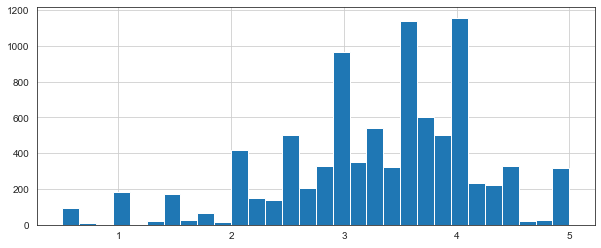

In [19]:
plt.figure(figsize=(10, 4))

ratings["rating"].hist(bins=30)

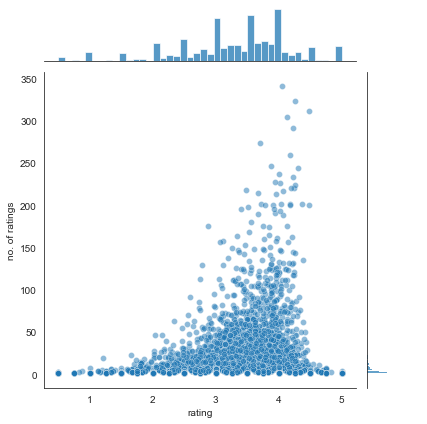

In [29]:
sns.jointplot(x="raBBting", y="no. of ratings", data=ratings, alpha=0.5)

# Recommending Similar Movies

In [20]:
# Determining the  columns in the data

print(data.columns.tolist())

['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']


In [ ]:
# Now let's create a matrix that has user_ids on one axis and movie title on the other axis 
# Each cell will have the rating the user gave to that movie
# N/B => There will be a lot of NaN values bcoz the user has not seen most of the movies

In [22]:
moviemat = data.pivot_table(index="userId", columns="title", values="rating")

moviemat.head(20)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Most Rated Movies=> Sorting the movies according to their rating

In [23]:
ratings.sort_values("no. of ratings", ascending=False).head(10)

,rating,no. of ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [ ]:
# Finding The Co-relation Between 2 Movies

In [24]:
forest_gump_user_ratings = moviemat["Forrest Gump (1994)"]
fugetive_user_ratings = moviemat["Fugitive, The (1993)"]

forest_gump_user_ratings.head(10)

userId
1     NaN
2     3.0
3     5.0
4     5.0
5     4.0
6     NaN
7     3.0
8     4.0
9     NaN
10    NaN
Name: Forrest Gump (1994), dtype: float64

In [39]:
# Now we, corrwith()=> function that allows a correlation between two pandas series

In [25]:
similar_to_forest_gump = moviemat.corrwith(forest_gump_user_ratings)

similar_to_fugetive = moviemat.corrwith(fugetive_user_ratings)

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
# Let's Clean This By Removing NaN values and using DataFrame instead of series

In [26]:
corr_forest_gump = pd.DataFrame(similar_to_forest_gump, columns=["Correlation"])
corr_forest_gump.dropna(inplace=True)
corr_forest_gump.head(10)

,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422
10 (1979),0.474420
10 Cloverfield Lane (2016),0.693375
10 Things I Hate About You (1999),0.277425
"10,000 BC (2008)",-0.763415


In [ ]:
# Sorting The Movies by Correlation , where we'll get all the similar movies to Forest Gump
# Though The Results can't be making sense coz,you can get some movies watched only once by 
#    a user who has watched Forest Gump

In [27]:
corr_forest_gump.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
$9.99 (2008),1.0
Say It Isn't So (2001),1.0
Metropolis (2001),1.0
"See No Evil, Hear No Evil (1989)",1.0
Middle Men (2009),1.0
Water for Elephants (2011),1.0
"Watch, The (2012)",1.0
Cheech & Chong's Next Movie (1980),1.0
Forrest Gump (1994),1.0


In [44]:
# Fixing the correlation issue,by filtering the movies with less than 100 reviews

In [46]:
corr_forest_gump = corr_forest_gump.join(ratings["no. of ratings"])

corr_forest_gump.head(10)


,Correlation,no. of ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13
10 (1979),0.474420,5
10 Cloverfield Lane (2016),0.693375,5
10 Things I Hate About You (1999),0.277425,57
"10,000 BC (2008)",-0.763415,8


In [28]:
corr_forest_gump[corr_forest_gump["no. of ratings"]>100].sort_values("Correlation",
                                                                     ascending=False).head(10)

KeyError: 'no. of ratings'

In [50]:
corr_fugetive = pd.DataFrame(similar_to_fugetive, columns = ["Correlation"])
corr_fugetive.dropna(inplace = True)
corr_fugetive = corr_fugetive.join(ratings["no. of ratings"])
corr_fugetive[corr_fugetive["no. of ratings"]>100].sort_values("Correlation", 
                                                              ascending=False).head(10)

,Correlation,no. of ratings
title,,
"Fugitive, The (1993)",1.000000,213
Inception (2010),0.617785,111
Star Trek: Generations (1994),0.531454,114
Minority Report (2002),0.471029,115
Rain Man (1988),0.468276,119
Jaws (1975),0.455502,108
"Rock, The (1996)",0.437086,135
Clear and Present Danger (1994),0.434240,115
Mission: Impossible (1996),0.431683,168


In [29]:
matrix_user_ratings = moviemat["Matrix, The (1999)"]

similar_to_matrix = moviemat.corrwith(matrix_user_ratings)

corr_matrix = pd.DataFrame(similar_to_matrix, columns=["Correlation"])

corr_matrix.dropna(inplace=True)

corr_matrix = corr_matrix.join(ratings["no. of ratings"])

corr_matrix[corr_matrix["no. of ratings"]>100].sort_values("Correlation", 
                                                           ascending=False).head(10)

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,no. of ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200
"Dark Knight, The (2008)",0.414997,121
Fight Club (1999),0.387573,202
Mission: Impossible (1996),0.385037,168
"Monsters, Inc. (2001)",0.361754,130
Star Wars: Episode VI - Return of the Jedi (1983),0.359646,217
